# Credit Card Fraud Detection

## Import Dataset

In [579]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [500]:
train = pd.read_csv('../data/fraudTrain.csv')
test = pd.read_csv('../data/fraudTest.csv')

## A look into the data

In [501]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [502]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [503]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [504]:
test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [505]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [506]:
test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


## Cleaning the data

In [507]:
train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [508]:
# drop unnecessary columns for data analysis
train.drop(['Unnamed: 0', 'first', 'last', 'trans_num'], inplace=True, axis=1)

In [509]:
# check for missing values
train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [510]:
# check for duplicates
train.duplicated().sum()

0

In [511]:
test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [512]:
# drop unnecessary columns for data analysis
test.drop(['Unnamed: 0', 'first', 'last', 'trans_num'], inplace=True, axis=1)

In [513]:
# check for missing values
test.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [514]:
# check for duplicates
test.duplicated().sum()

0

In [515]:
# Split the 'trans_date_trans_time' column into 'trans_date'
train[['trans_date']] = train['trans_date_trans_time'].str.split(' ', expand=True)[0]

train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])
train['trans_date'] = pd.to_datetime(train['trans_date'])

train['trans_day'] = train['trans_date_trans_time'].dt.day
train['trans_month'] = train['trans_date_trans_time'].dt.month
train['trans_year'] = train['trans_date_trans_time'].dt.year
train['trans_hour'] = train['trans_date_trans_time'].dt.hour

In [516]:
# do the same in test data
test[['trans_date']] = test['trans_date_trans_time'].str.split(' ', expand=True)[0]

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])
test['trans_date'] = pd.to_datetime(test['trans_date'])

test['trans_day'] = test['trans_date_trans_time'].dt.day
test['trans_month'] = test['trans_date_trans_time'].dt.month
test['trans_year'] = test['trans_date_trans_time'].dt.year
test['trans_hour'] = test['trans_date_trans_time'].dt.hour

In [517]:
# calculate age of the customer
train['age_at_transaction'] = (train['trans_date'] - train['dob']).dt.days // 365

In [518]:
# do the same in test data
test['age_at_transaction'] = (test['trans_date'] - test['dob']).dt.days // 365

In [519]:
# remove 'fraud_' from merchant column
train['merchant'] = train['merchant'].str.replace('fraud_', '')

In [520]:
# do the same in test data
test['merchant'] = test['merchant'].str.replace('fraud_', '')

In [521]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

**Review**

The dataset doesn't have any missing values or duplicates. The dataset did have wrong datetime types. I featured engineered the age_at_transaction column to determine how old the person was at the time of tranaction. I also removed "fraud_" from the merchant column to get a cleaner name of each merchant. Overall, there wasn't much to clean with this dataset.

In [522]:
train

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_day,trans_month,trans_year,trans_hour,age_at_transaction
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,1325376018,36.011293,-82.048315,0,2019-01-01,1,1,2019,0,30
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,1325376044,49.159047,-118.186462,0,2019-01-01,1,1,2019,0,40
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,1325376051,43.150704,-112.154481,0,2019-01-01,1,1,2019,0,56
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,1325376076,47.034331,-112.561071,0,2019-01-01,1,1,2019,0,52
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,1325376186,38.674999,-78.632459,0,2019-01-01,1,1,2019,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,Reichel Inc,entertainment,15.56,M,162 Jessica Row Apt. 072,Hatch,UT,84735,...,1371816728,36.841266,-111.690765,0,2020-06-21,21,6,2020,12,58
1296671,2020-06-21 12:12:19,6011149206456997,Abernathy and Sons,food_dining,51.70,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,...,1371816739,38.906881,-78.246528,0,2020-06-21,21,6,2020,12,40
1296672,2020-06-21 12:12:32,3514865930894695,Stiedemann Ltd,food_dining,105.93,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,...,1371816752,33.619513,-105.130529,0,2020-06-21,21,6,2020,12,52
1296673,2020-06-21 12:13:36,2720012583106919,"Reinger, Weissnat and Strosin",food_dining,74.90,M,42933 Ryan Underpass,Manderson,SD,57756,...,1371816816,42.788940,-103.241160,0,2020-06-21,21,6,2020,12,39


# Outlier Detection

In [523]:
numerical_columns = ['amt', 'city_pop', 'unix_time', 'age_at_transaction']

In [524]:
# function to plot outliers
def plot_outlier(df, col):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(numerical_columns):
        plt.subplot(1, 4, i + 1)
        sns.boxplot(df[col])
        plt.title(col)
        plt.xlabel(col)

    plt.show()

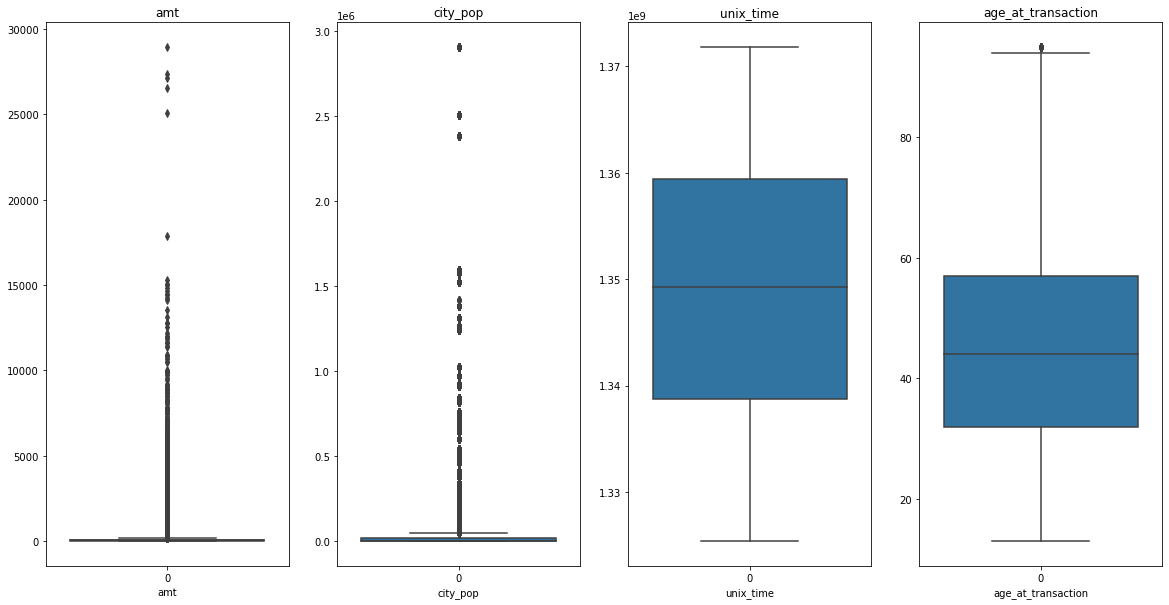

In [525]:
# find outlier in numerical columns in train data
plot_outlier(train, numerical_columns)

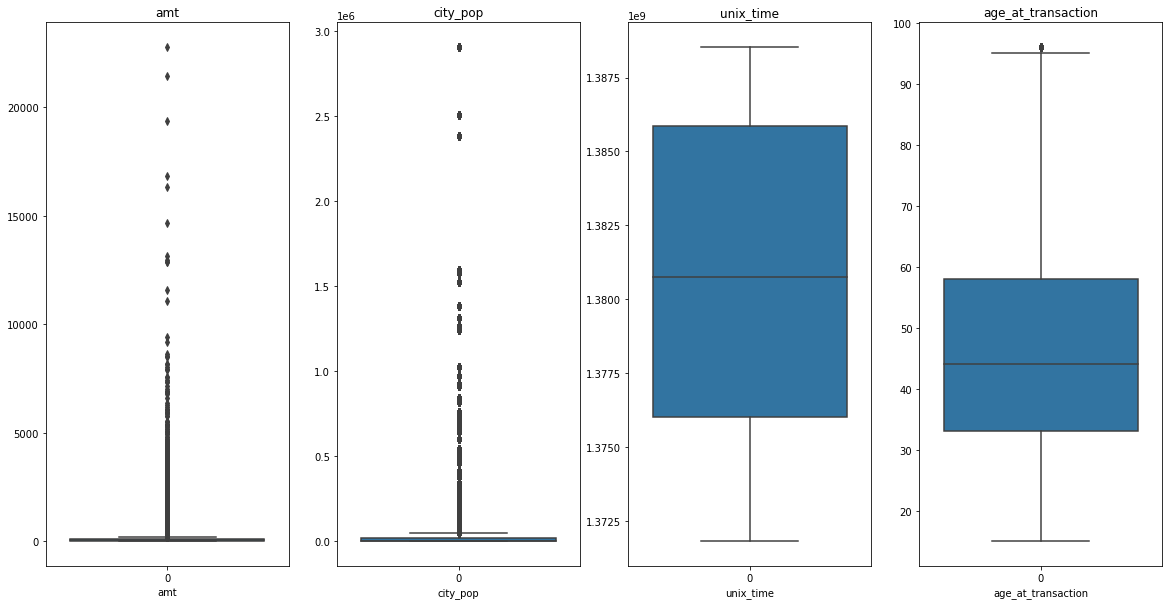

In [526]:
# find outlier in numerical columns in test data
plot_outlier(test, numerical_columns)

**Review**

Since our goal is to identify fradulent credit card transaction, outliers could potentially play a crucial role. The outliers found could be those fraud payments. Therefore, all outliers will be kept to further examine the nature of outliers and how they relate to fraud.

## Correlation Matrices

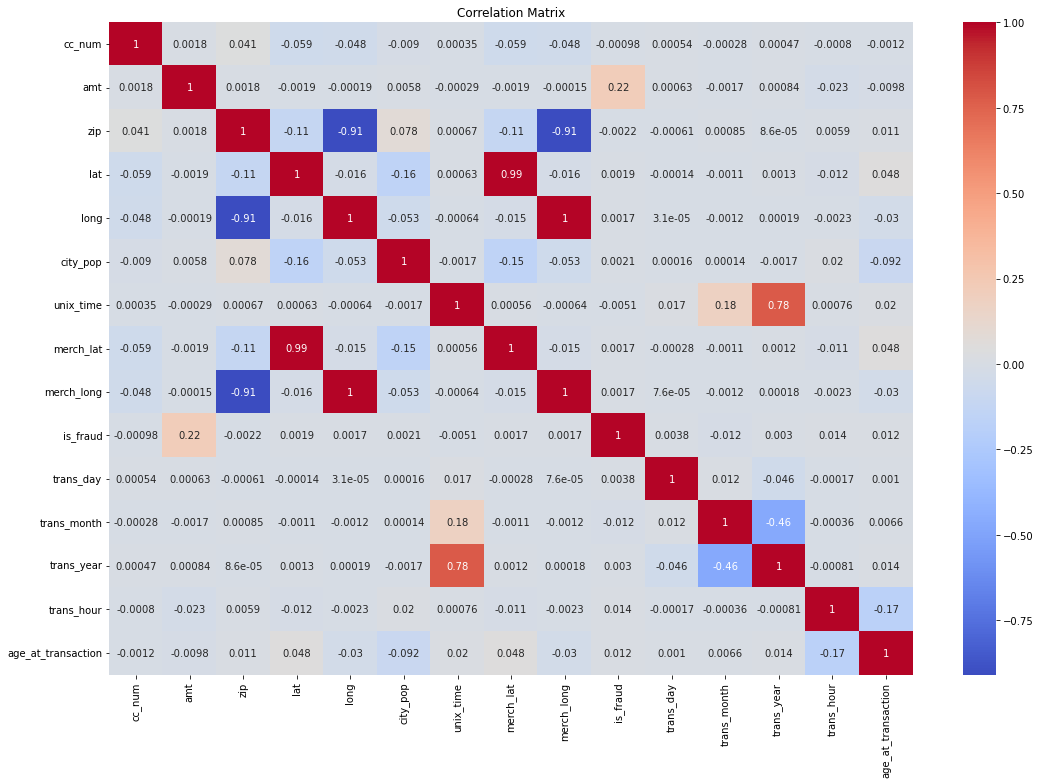

In [527]:
# plot correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Visualization

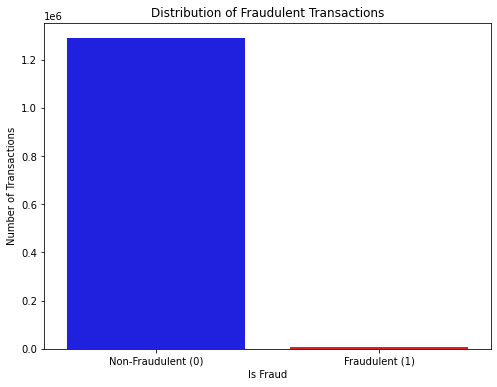

In [528]:
# Count the number of occurrences of each unique value in the 'is_fraud' column
fraud_counts = train['is_fraud'].value_counts().reset_index()
fraud_counts.columns = ['is_fraud', 'count']

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='is_fraud', y='count', data=fraud_counts, palette=['blue', 'red'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

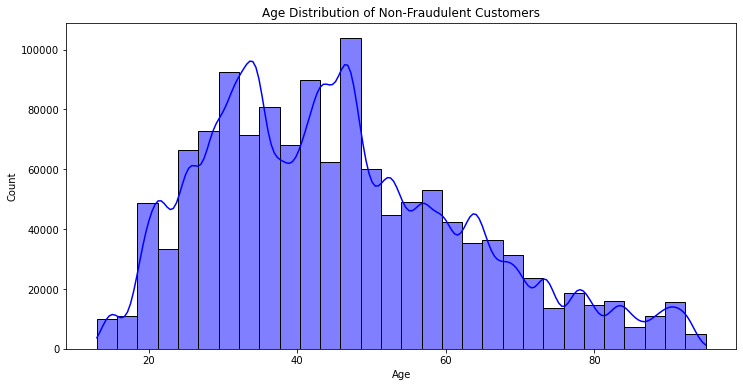

In [529]:
# plot age of non-fraudulent customers in blue
plt.figure(figsize=(12, 6))
sns.histplot(train[train['is_fraud'] == 0]['age_at_transaction'], bins=30, color='blue', kde=True)
plt.title('Age Distribution of Non-Fraudulent Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

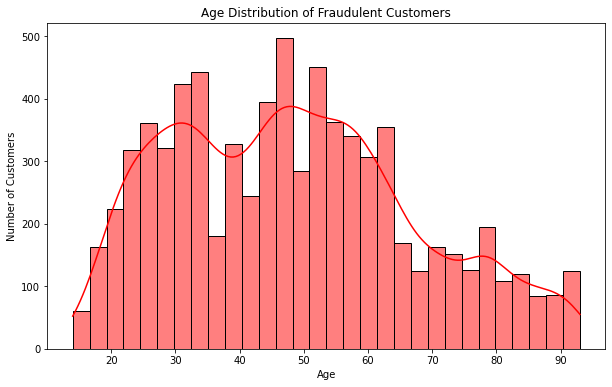

In [530]:
# plot age of fraud customers in red
plt.figure(figsize=(10, 6))
sns.histplot(train[train['is_fraud'] == 1]['age_at_transaction'], bins=30, color='red', kde=True)
plt.title('Age Distribution of Fraudulent Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

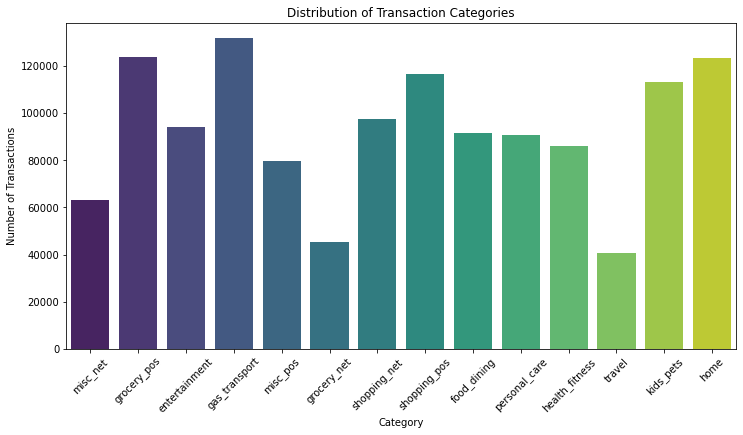

In [531]:
# plot different number of categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=train, palette='viridis')
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

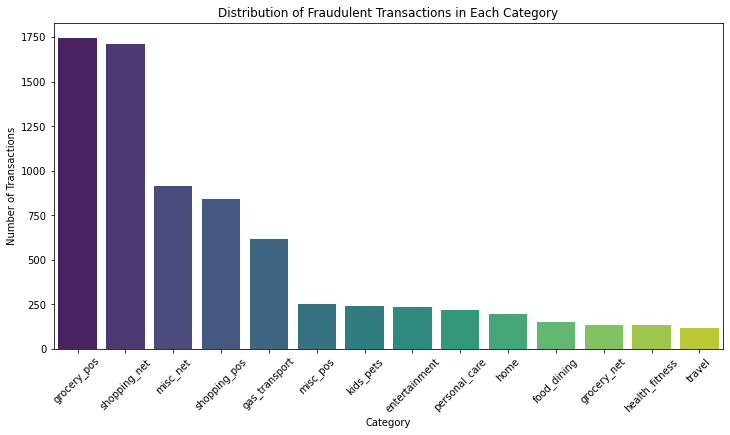

In [532]:
# plot the number of fraudulent transactions in each category sorted from highest to lowest
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=train[train['is_fraud'] == 1], palette='viridis', order=train[train['is_fraud'] == 1]['category'].value_counts().index)
plt.title('Distribution of Fraudulent Transactions in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

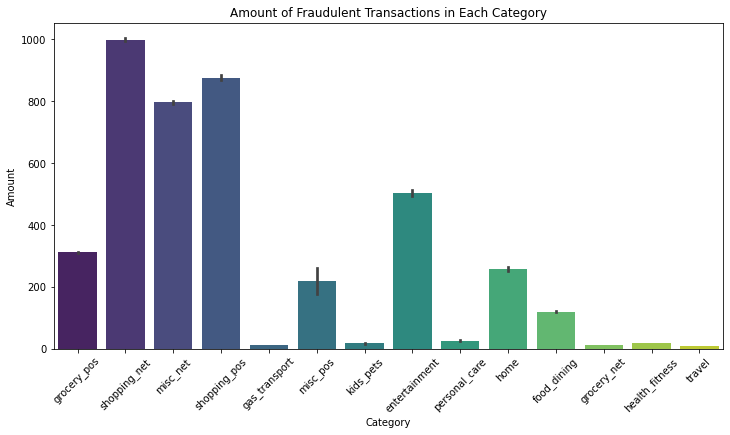

In [533]:
# plot the amount of fraudulent transaction sorted from highest to lowest
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='amt', data=train[train['is_fraud'] == 1], palette='viridis', order=train[train['is_fraud'] == 1]['category'].value_counts().index)
plt.title('Amount of Fraudulent Transactions in Each Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

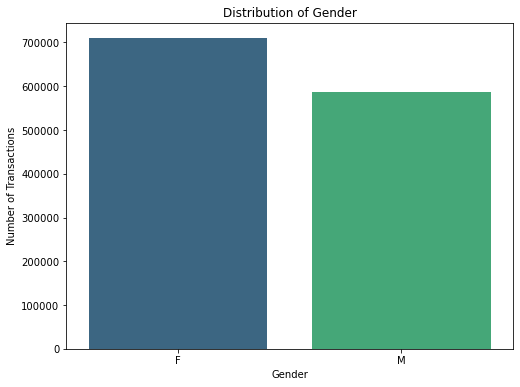

In [534]:
# plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=train, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

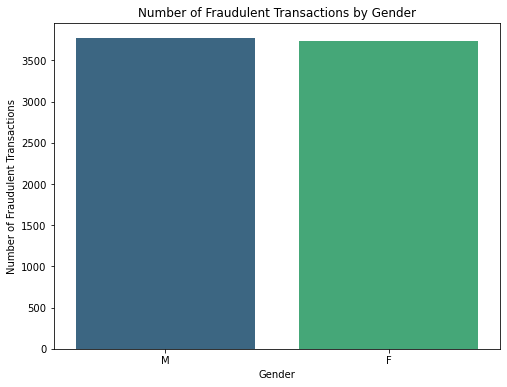

In [535]:
fraud_counts = train[train['is_fraud'] == 1]
fraud_counts_by_gender = fraud_counts['gender'].value_counts().reset_index()
fraud_counts_by_gender.columns = ['gender', 'count']

# plot fraud transactions by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='count', data=fraud_counts_by_gender, palette='viridis')
plt.title('Number of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

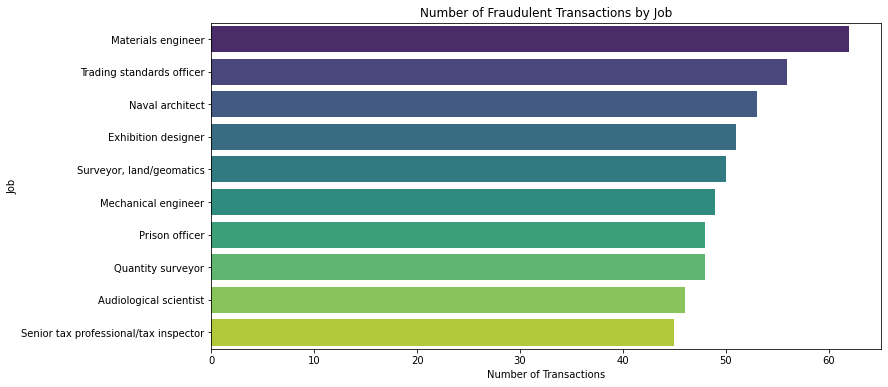

In [536]:
# plot fraud transactions by job (top 10)
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=train[train['is_fraud'] == 1], palette='viridis', order=train[train['is_fraud'] == 1]['job'].value_counts().index[:10])
plt.title('Number of Fraudulent Transactions by Job')
plt.xlabel('Number of Transactions')
plt.ylabel('Job')
plt.show()

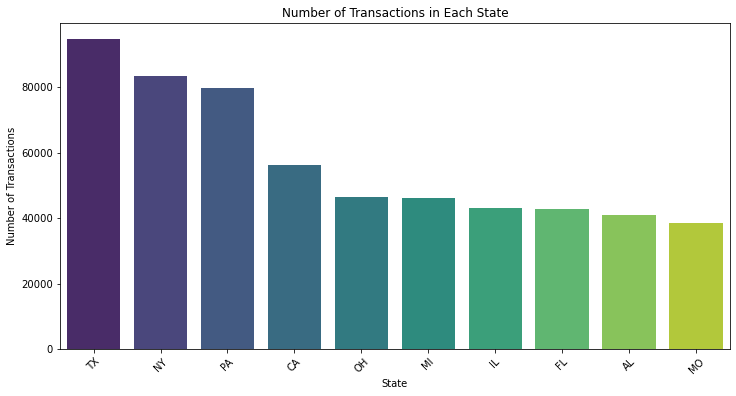

In [537]:
# graph a map of the United States with the number of transactions in each state
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=train, palette='viridis', order=train['state'].value_counts().index[:10])
plt.title('Number of Transactions in Each State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

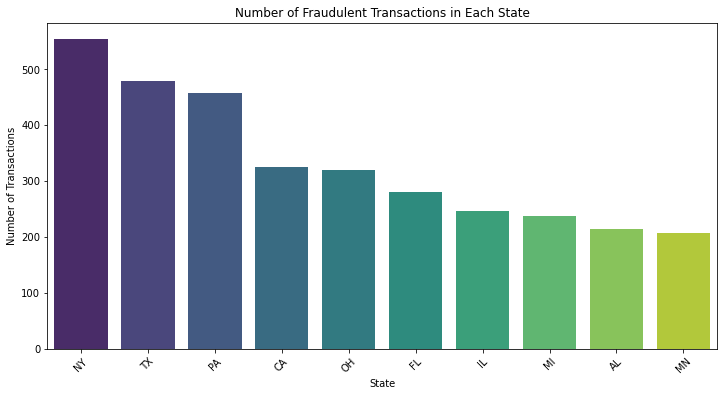

In [538]:
# graph a map of the United States with the number of fraudulent transactions in each state
plt.figure(figsize=(12, 6))
sns.countplot(x='state', data=train[train['is_fraud'] == 1], palette='viridis', order=train[train['is_fraud'] == 1]['state'].value_counts().index[:10])
plt.title('Number of Fraudulent Transactions in Each State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

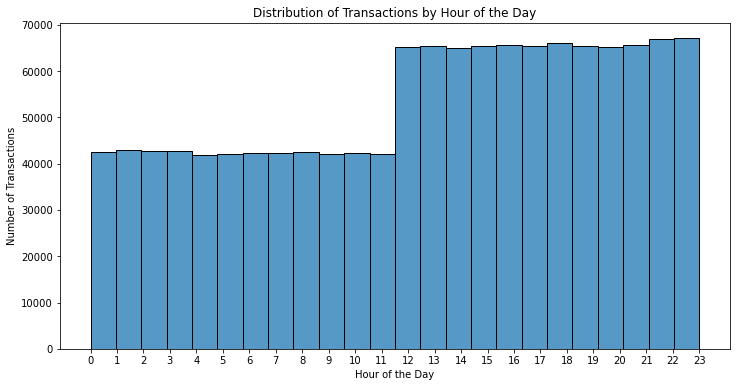

In [539]:
# what time of the day do most transactions occur
train['trans_hour'] = train['trans_date_trans_time'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(train['trans_hour'], bins=24, kde=False)
plt.title('Distribution of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.show()

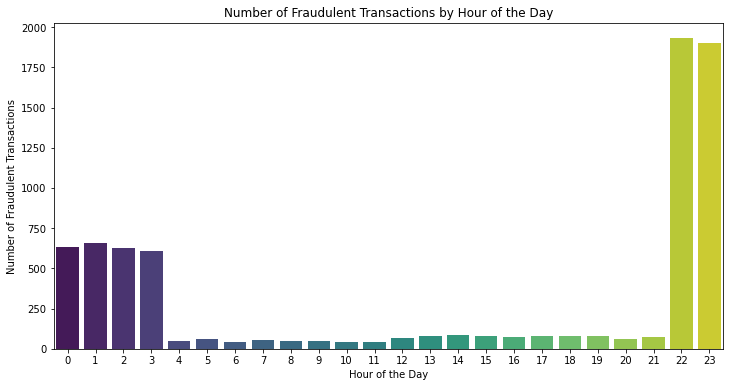

In [540]:
# what time of the day do most fraudulent transactions occur
fraud_counts['trans_hour'] = fraud_counts['trans_date_trans_time'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='trans_hour', data=fraud_counts, palette='viridis')
plt.title('Number of Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))
plt.show()

## Preprocessing Dataset

In [541]:
# drop unnecessary columns for model training
train.drop(columns=['trans_date_trans_time', 'cc_num', 'lat', 'long', 'merchant', 'street', 'zip', 'dob', 'unix_time', 'trans_date', 'trans_year', 'age_at_transaction'], inplace=True)
test.drop(columns=['trans_date_trans_time', 'cc_num', 'lat', 'long', 'merchant', 'street', 'zip', 'dob', 'unix_time', 'trans_date', 'trans_year', 'age_at_transaction'], inplace=True)

In [542]:
train.drop(columns=['gender', 'merch_lat', 'merch_long'], inplace=True)

In [543]:
train.shape

(1296675, 10)

In [544]:
train.columns

Index(['category', 'amt', 'city', 'state', 'city_pop', 'job', 'is_fraud',
       'trans_day', 'trans_month', 'trans_hour'],
      dtype='object')

In [545]:
# take a sample of dataset
train_sample, _ = train_test_split(train, test_size=0.95, stratify=train['is_fraud'] , random_state=42)

In [546]:
train_sample.shape

(64833, 10)

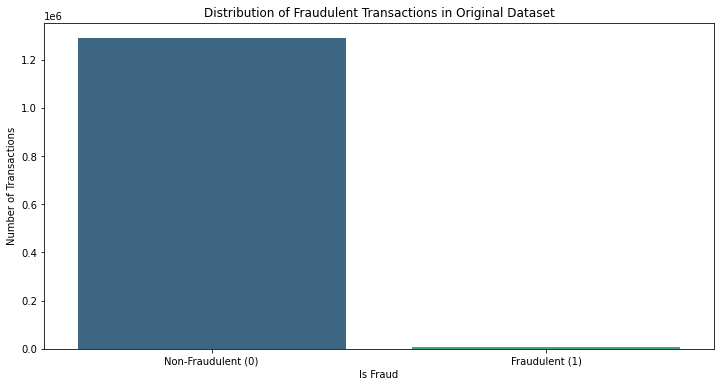

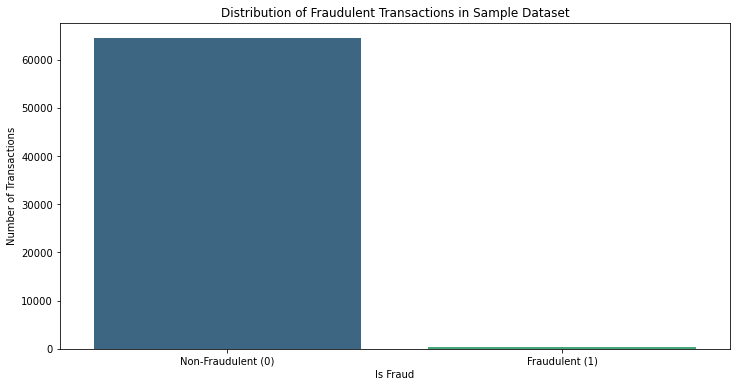

0    64458
1      375
Name: is_fraud, dtype: int64

In [547]:
# graph distribution of original and sample dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='is_fraud', data=train, palette='viridis')
plt.title('Distribution of Fraudulent Transactions in Original Dataset')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='is_fraud', data=train_sample, palette='viridis')
plt.title('Distribution of Fraudulent Transactions in Sample Dataset')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

# of the sample data how many are fraudulent and non-fraudulent
train_sample['is_fraud'].value_counts()

In [548]:
X = train_sample.drop('is_fraud', axis=1)
y = train_sample['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [549]:
# Separate features and target variable
# X_train = train.drop(columns=['is_fraud'])
# y_train = train['is_fraud']
# X_test = test.drop(columns=['is_fraud'])
# y_test = test['is_fraud']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51866, 9) (51866,) (12967, 9) (12967,)


In [550]:
# find unique job titles
train['job'].nunique()

494

In [551]:
# find unique in all columns
for col in train.columns:
    print(f'{col}: {train[col].nunique()}')

category: 14
amt: 52928
city: 894
state: 51
city_pop: 879
job: 494
is_fraud: 2
trans_day: 31
trans_month: 12
trans_hour: 24


In [552]:
X_train

,category,amt,city,state,city_pop,job,trans_day,trans_month,trans_hour
331528,gas_transport,61.41,Arcadia,MI,680,"Designer, jewellery",7,6,2
643626,shopping_pos,3.64,Ruckersville,VA,9815,"Designer, ceramics/pottery",30,9,17
1254767,kids_pets,44.58,Fort Washakie,WY,1645,Freight forwarder,6,6,17
616224,grocery_pos,88.25,Loami,IL,1213,English as a foreign language teacher,19,9,3
614309,grocery_net,65.69,Meredith,CO,61,Public relations account executive,18,9,0
...,...,...,...,...,...,...,...,...,...
248623,health_fitness,107.59,Browning,MO,602,Cytogeneticist,4,5,19
230504,personal_care,40.74,Honokaa,HI,4878,Physiotherapist,26,4,19
98568,grocery_net,65.64,Jay,FL,5719,Higher education careers adviser,27,2,10
1283829,shopping_pos,42.96,Dunlevy,PA,427,Mining engineer,16,6,7


In [553]:
numerical_cols = ['amt', 'city_pop', 'trans_day', 'trans_month', 'trans_hour']
categorical_cols = ['category', 'city', 'state', 'job']

In [554]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [555]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

In [556]:
# Pipeline for preprocessing data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [557]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print(f"{model_name} Training Classification Report:\n", classification_report(y_train, y_train_pred))
    print(f"{model_name} Test Classification Report:\n", classification_report(y_test, y_test_pred))
    

    # Confusion matrix
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Training Confusion Matrix')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Test Confusion Matrix')
    plt.show()


    # ROC AUC score
    train_roc_auc = roc_auc_score(y_train, y_train_proba)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    
    print(f"{model_name} Training ROC AUC Score:", train_roc_auc)
    print(f"{model_name} Test ROC AUC Score:", test_roc_auc)

    
    # Plot ROC curves for both training and test sets
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Training (area = {train_roc_auc:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test (area = {test_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Model Building

### Baseline Logistic Regression

In [558]:
# Logistic Regression Model
baseline_logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [559]:
# check how many columns are in the dataset
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed.shape

(51866, 1419)

In [560]:
# Train the Logistic Regression Model
baseline_logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'city_pop',
                                                   'trans_day', 'trans_month',
                                                   'trans_hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'city', 'state',
                                                   'job'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [561]:
# Predict on the training data using Logistic Regression
y_train_pred_logistic = baseline_logistic_model.predict(X_train)

# Predict on the test data using Logistic Regression
y_test_pred_logistic = baseline_logistic_model.predict(X_test)

Baseline Logistic Regression Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     51555
           1       0.45      0.05      0.09       311

    accuracy                           0.99     51866
   macro avg       0.72      0.52      0.54     51866
weighted avg       0.99      0.99      0.99     51866

Baseline Logistic Regression Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12903
           1       0.67      0.03      0.06        64

    accuracy                           1.00     12967
   macro avg       0.83      0.52      0.53     12967
weighted avg       0.99      1.00      0.99     12967



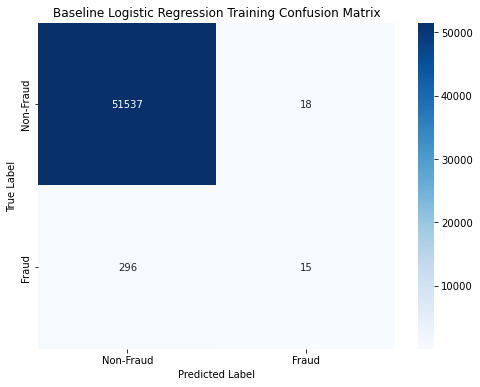

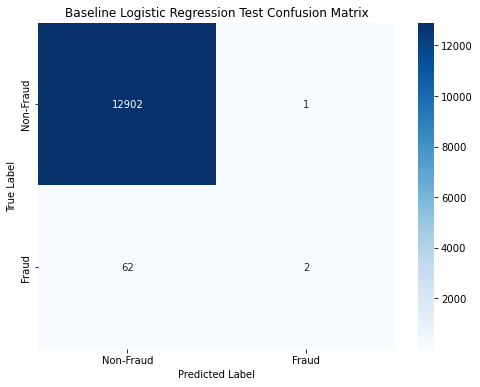

Baseline Logistic Regression Training ROC AUC Score: 0.9373268831307746
Baseline Logistic Regression Test ROC AUC Score: 0.8502685906378361


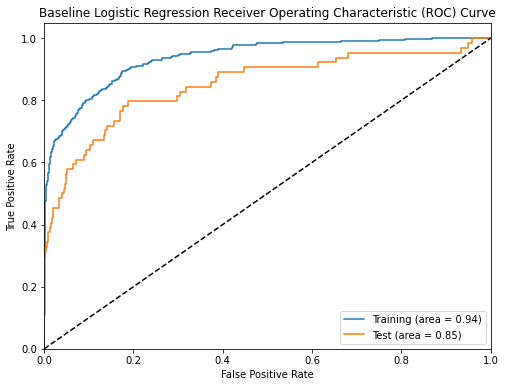

In [562]:
evaluate_model(baseline_logistic_model, X_train, y_train, X_test, y_test, "Baseline Logistic Regression")

### Tuned Logistic Regression

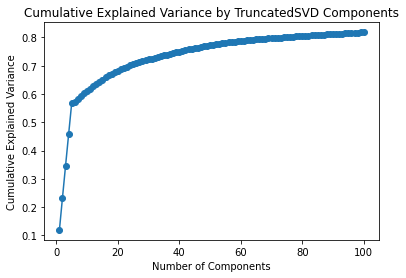

Maximum cumulative variance with 100 components: 0.818342091186566


In [563]:
# Finding the best n-components for TruncatedSVD
svd = TruncatedSVD(n_components=100)
X_preprocessed = preprocessor.fit_transform(X_train)
svd.fit(X_preprocessed)

# Plot cumulative explained variance
cumulative_variance = svd.explained_variance_ratio_.cumsum()
plt.plot(range(1, 101), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by TruncatedSVD Components')
plt.show()

# Print maximum cumulative variance
print(f'Maximum cumulative variance with 100 components: {cumulative_variance[-1]}')

In [564]:
# Logistic Regression Model
logistic_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('svd', TruncatedSVD(n_components=100)),
    ('classifier', LogisticRegression(random_state=42))
])

In [565]:
# parameter grid for hyperparameter tuning
logistic_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['lbfgs', 'liblinear'], 
    'classifier__class_weight': [None, 'balanced'],
    'classifier__max_iter': [100, 200],
}

In [566]:
# check how many columns are in the dataset
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed.shape

(51866, 1419)

In [571]:
# Set up GridSearchCV
grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='average_precision', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['amt',
                                                                          'city_pop',
                                                                          'trans_day',
                                                                          'trans_month',
                                                                          'trans_hour']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(ha...
                                       ('smote', SMOTE(random_state=42)),
                                       ('svd', TruncatedSVD(n_components=100)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_iter': [100, 200],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear']},
             scoring='average_precision')

In [572]:
# Get the best model
best_logistic_model = grid_search.best_estimator_

In [578]:
# Get the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__max_iter': 200, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


Tuned Logistic Regression Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     51555
           1       0.04      0.81      0.07       311

    accuracy                           0.88     51866
   macro avg       0.52      0.84      0.50     51866
weighted avg       0.99      0.88      0.93     51866

Tuned Logistic Regression Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     12903
           1       0.03      0.77      0.06        64

    accuracy                           0.88     12967
   macro avg       0.51      0.82      0.50     12967
weighted avg       0.99      0.88      0.93     12967



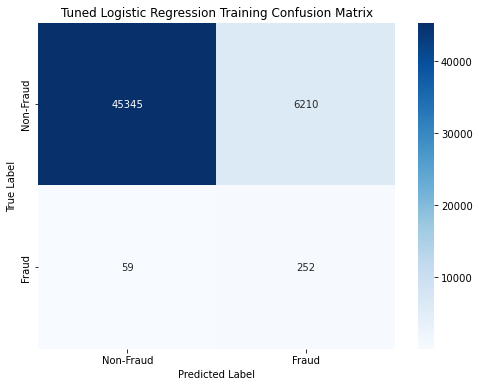

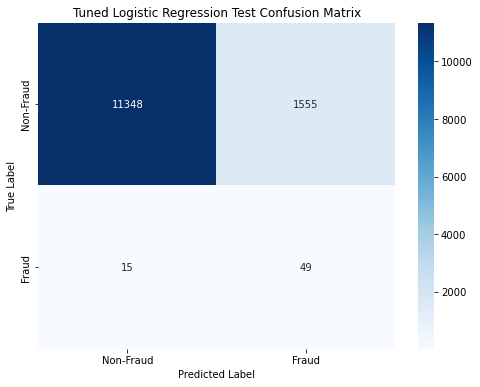

Tuned Logistic Regression Training ROC AUC Score: 0.9339476056694674
Tuned Logistic Regression Test ROC AUC Score: 0.8968735468495698


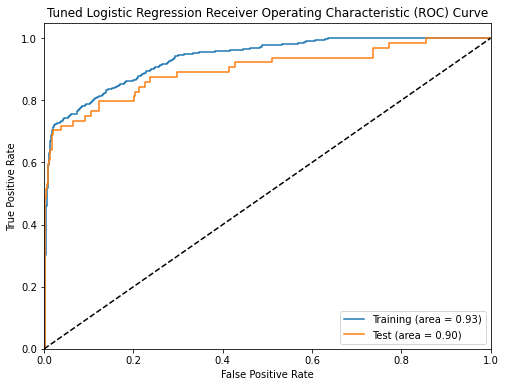

In [574]:
evaluate_model(best_logistic_model, X_train, y_train, X_test, y_test, "Tuned Logistic Regression")

### Random Forest

In [580]:
# Random Forest Model
random_forest_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('svd', TruncatedSVD(n_components=100)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [581]:
random_forest_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [583]:
grid_search_rf = GridSearchCV(random_forest_model, random_forest_param_grid, cv=5, scoring='average_precision', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_random_forest_model = grid_search.best_estimator_

In [ ]:
# Print the best parameters and score
print(f'Best parameters: {grid_search_rf.best_params_}')
print(f'Best Precision-Recall AUC score: {grid_search_rf.best_score_}')

In [ ]:
evaluate_model(best_random_forest_model, X_train, y_train, X_test, y_test, "Tuned Random Forest")